### Phase 3: Conduct EDA and classification model construction using the master_math.csv file that contains all relevant features and target variable

#### Importing all necessary libraries

In [1]:
import pandas
pandas.__version__
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV, learning_curve, cross_val_predict
# from sklearn.linear_model import LinearRegression, LassoCV, Ridge, LassoLarsCV,ElasticNetCV
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install --user scikit-learn

In [3]:
cd /Users/dansa/Documents/GitHub/Phase1/Data/MASTER

C:\Users\dansa\Documents\GitHub\Phase1\Data\MASTER


#### Loading the data and reformatting the school id column

In [4]:
master_math_new = pandas.read_csv("master_math.csv")
master_math_new['NCESSCH'] = master_math_new['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))
master_math_new.head()

,SCHOOL_YEAR_x,ST_x,NAME,NCESSCH,LEVEL,SCH_TYPE_TEXT_x,SCH_TYPE_x,TITLEI_STATUS,TITLEI_STATUS_TEXT,TEACHERS,...,Total_AP_math_students,Total_students_tookAP,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,Total_Alg1_enroll_students,Total_Alg1_pass_students,Income_Poverty_ratio,IPR_SE,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718_new
0,2017-2018,AL,Albertville High School,010000500871,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,77.00,...,53.0,286.0,23.0,23.0,450.0,428.0,248.0,80.0,337.0,37.0
1,2017-2018,AL,Asbury High School,010000600872,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,28.64,...,0.0,46.0,4.0,4.0,63.0,62.0,241.0,127.0,327.0,34.0
2,2017-2018,AL,Douglas High School,010000600878,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,30.87,...,18.0,244.0,4.0,4.0,117.0,113.0,213.0,51.0,130.0,37.0
3,2017-2018,AL,Kate D Smith DAR High School,010000600883,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,24.04,...,18.0,205.0,4.0,4.0,105.0,105.0,254.0,48.0,106.0,57.0
4,2017-2018,AL,Brindlee Mountain High School,010000601585,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,31.26,...,11.0,102.0,4.0,4.0,161.0,149.0,329.0,150.0,338.0,31.0


In [5]:
master_math_new.shape

(13800, 37)

#### Inspecting the data file

In [6]:
master_math_new.columns

Index(['SCHOOL_YEAR_x', 'ST_x', 'NAME', 'NCESSCH', 'LEVEL', 'SCH_TYPE_TEXT_x',
       'SCH_TYPE_x', 'TITLEI_STATUS', 'TITLEI_STATUS_TEXT', 'TEACHERS',
       'FARMS_COUNT', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'Total_enroll_students',
       'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT',
       'FTE_teachers_count', 'SalaryforTeachers', 'Total_SAT_ACT_students',
       'SCH_IBENR_IND_new', 'Total_IB_students', 'SCH_APENR_IND_new',
       'SCH_APCOURSES', 'SCH_APMATHENR_IND_new', 'Total_AP_math_students',
       'Total_students_tookAP', 'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG',
       'Total_Alg1_enroll_students', 'Total_Alg1_pass_students',
       'Income_Poverty_ratio', 'IPR_SE', 'ALL_MTH00NUMVALID_1718',
       'ALL_MTH00PCTPROF_1718_new'],
      dtype='object')

Create a data frame with only the needed columns for further analysis

In [7]:
math=pd.DataFrame(master_math_new, columns=[ 'NCESSCH', 'SCH_TYPE_x', 
       'TITLEI_STATUS','TEACHERS', 'FARMS_COUNT', 'Total_enroll_students',
       'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT',
       'FTE_teachers_count', 'SalaryforTeachers', 'Total_SAT_ACT_students',
       'SCH_IBENR_IND_new', 'Total_IB_students', 'SCH_APENR_IND_new',
       'SCH_APCOURSES', 'SCH_APMATHENR_IND_new','Total_AP_math_students',
       'Total_students_tookAP', 'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG',
       'Total_Alg1_enroll_students', 'Total_Alg1_pass_students',
       'Income_Poverty_ratio','ALL_MTH00PCTPROF_1718_new'])

In [8]:
math.head()

,NCESSCH,SCH_TYPE_x,TITLEI_STATUS,TEACHERS,FARMS_COUNT,Total_enroll_students,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT,FTE_teachers_count,...,SCH_APCOURSES,SCH_APMATHENR_IND_new,Total_AP_math_students,Total_students_tookAP,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,Total_Alg1_enroll_students,Total_Alg1_pass_students,Income_Poverty_ratio,ALL_MTH00PCTPROF_1718_new
0,010000500871,1,SWELIGSWPROG,77.00,832.0,1449.0,78.17,71.17,7.0,72.88,...,8.0,1.0,53.0,286.0,23.0,23.0,450.0,428.0,248.0,37.0
1,010000600872,1,SWELIGSWPROG,28.64,450.0,547.0,32.00,31.00,1.0,32.00,...,3.0,0.0,0.0,46.0,4.0,4.0,63.0,62.0,241.0,34.0
2,010000600878,1,SWELIGSWPROG,30.87,429.0,591.0,36.00,36.00,0.0,36.00,...,6.0,1.0,18.0,244.0,4.0,4.0,117.0,113.0,213.0,37.0
3,010000600883,1,SWELIGSWPROG,24.04,211.0,452.0,29.00,29.00,0.0,29.00,...,6.0,1.0,18.0,205.0,4.0,4.0,105.0,105.0,254.0,57.0
4,010000601585,1,SWELIGSWPROG,31.26,415.0,632.0,37.00,36.00,1.0,37.00,...,5.0,1.0,11.0,102.0,4.0,4.0,161.0,149.0,329.0,31.0


In [9]:
math.rename(columns={'NCESSCH':'School_ID', 'SCH_TYPE_x':'School_type','FARMS_COUNT':'No.FARMS_students',
                       'SCH_FTETEACH_TOT':'FTE_teachcount','SCH_FTETEACH_CERT':'Certified_FTE_teachers','SCH_FTETEACH_NOTCERT':
                       'Noncertified_FTE_teachers','Total_SAT_ACT_students':'Students_participate_SAT_ACT','SCH_IBENR_IND_new':'IB_Indicator',
                       'SCH_APENR_IND_new':'AP_Indicator','SCH_APCOURSES':'No.ofAP_courses_offer','SCH_APMATHENR_IND_new':'Students_enroll_inAPMath?',
                       'SCH_MATHCLASSES_ALG':'No.ofAlg1classes','SCH_MATHCERT_ALG':'Alg1_taught_by_certmathteahcers',
                       'ALL_MTH00PCTPROF_1718_new':'Percent_Math_Proficient'}, inplace=True)

In [10]:
math.describe().T

,count,mean,std,min,25%,50%,75%,max
School_type,13800.0,1.167681e+00,6.793244e-01,1.00,1.0000,1.000,1.000000e+00,4.00
TEACHERS,13800.0,5.053515e+01,4.110120e+01,0.00,19.0275,37.135,7.416250e+01,302.00
No.FARMS_students,13800.0,3.946875e+02,4.423191e+02,0.00,101.0000,228.000,5.280000e+02,4329.00
Total_enroll_students,13800.0,8.483769e+02,7.679972e+02,10.00,259.0000,559.000,1.277000e+03,4996.00
FTE_teachcount,13800.0,5.260862e+01,4.235090e+01,1.10,20.0000,39.000,7.700000e+01,361.00
Certified_FTE_teachers,13800.0,5.125174e+01,4.167501e+01,0.00,19.5000,37.900,7.500000e+01,361.00
Noncertified_FTE_teachers,13800.0,1.355788e+00,4.534651e+00,0.00,0.0000,0.000,1.000000e+00,157.00
FTE_teachers_count,13800.0,5.401679e+01,6.757459e+02,0.10,18.5975,35.800,7.040000e+01,79297.76
SalaryforTeachers,13800.0,3.009350e+06,2.859838e+06,50.39,978955.2425,1997079.520,4.302380e+06,29732778.00
Students_participate_SAT_ACT,13800.0,2.072055e+02,2.368639e+02,1.00,43.0000,117.000,2.910000e+02,2788.00


In [11]:
counts = math['IB_Indicator'].value_counts().to_dict()
print (counts)

{0.0: 13072, 1.0: 727, -6.0: 1}


In [12]:
math=math[math['IB_Indicator']!=-6]

In [13]:
counts = math['IB_Indicator'].value_counts().to_dict()
print (counts)

{0.0: 13072, 1.0: 727}


In [14]:
print(math.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13799 entries, 0 to 13799
Data columns (total 25 columns):
School_ID                          13799 non-null object
School_type                        13799 non-null int64
TITLEI_STATUS                      13799 non-null object
TEACHERS                           13799 non-null float64
No.FARMS_students                  13799 non-null float64
Total_enroll_students              13799 non-null float64
FTE_teachcount                     13799 non-null float64
Certified_FTE_teachers             13799 non-null float64
Noncertified_FTE_teachers          13799 non-null float64
FTE_teachers_count                 13799 non-null float64
SalaryforTeachers                  13799 non-null float64
Students_participate_SAT_ACT       13799 non-null float64
IB_Indicator                       13799 non-null float64
Total_IB_students                  13799 non-null float64
AP_Indicator                       13799 non-null float64
No.ofAP_courses_offer    

We have 13,799 entries and no null values in any column. There are 25 columns, but we can drop the school_id and we'll want to split off the Percent_Math_Proficient.
The object type features should be strings.

Let's take a quick look at some of the data.

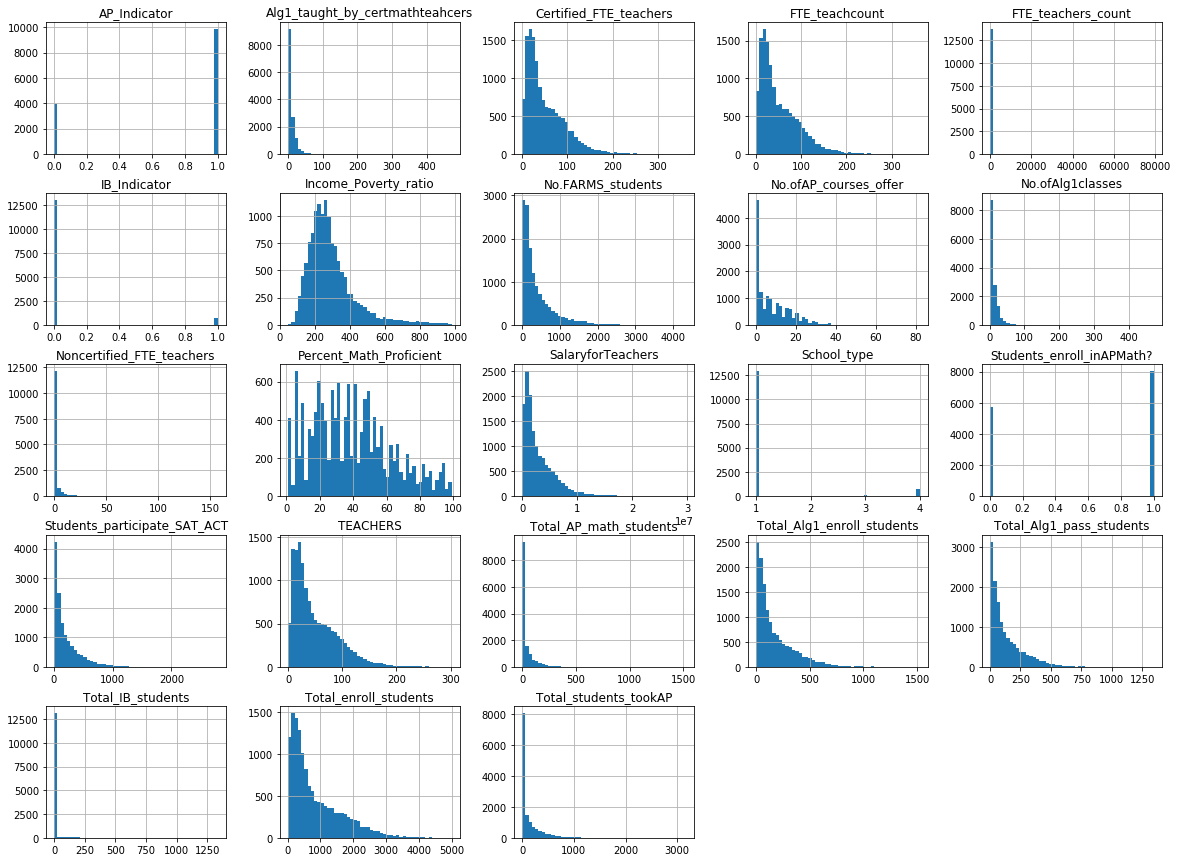

In [15]:
math.hist(bins=50, figsize=(20,15))
plt.show()

We can see that some features have most of their instances at or near zero and relatively few instances at higher values, in some cases much higher. Other features cluster close to zero and have long tails. We also see the percent_math_proficient is almost normally distributed.

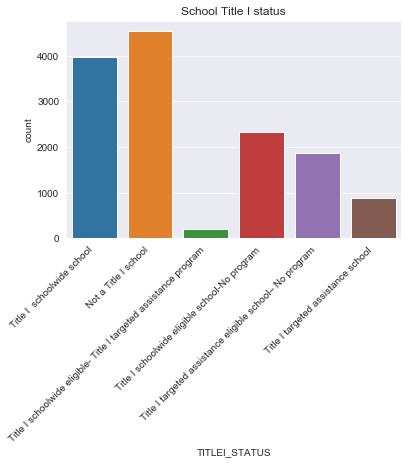

In [16]:
sns.set_style('darkgrid')
_plt = sns.countplot(x='TITLEI_STATUS', data=math)
_plt.set_title('School Title I status')
_plt.set_xticklabels(['Title I  schoolwide school','Not a Title I school','Title I schoolwide eligible- Title I targeted assistance program','Title I schoolwide eligible school-No program','Title I targeted assistance eligible school– No program','Title I targeted assistance school'])
_plt.set_xticklabels(_plt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/dansa/Documents/Title1_M_dist.png', dpi=300, bbox_inches='tight')
plt.show()

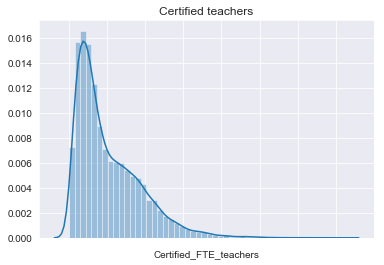

In [17]:
sns.set_style('darkgrid')
cert=math['Certified_FTE_teachers']
_plt = sns.distplot(cert)
_plt.set_title('Certified teachers')
_plt.set_xticklabels(_plt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/dansa/Documents/Certified_FTE_teachers_M_dist.png', dpi=300, bbox_inches='tight')
plt.show()


 mu = 38.69 and sigma = 23.67



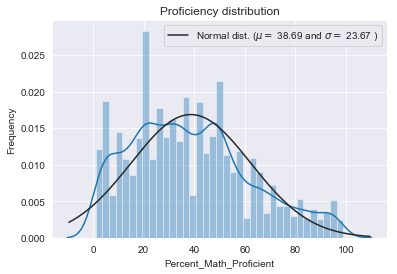

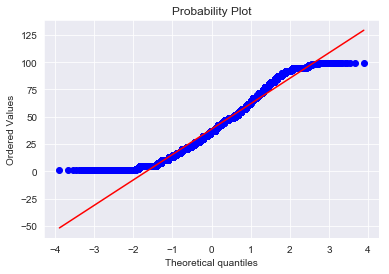

Skewness: 0.490791
Kurtosis: -0.414173


In [18]:
# Plot Histogram
from scipy.stats import norm
sns.distplot(math['Percent_Math_Proficient'] , fit=norm);
# weights = np.ones_like(np.array(math['Percent_Math_Proficient']))/float(len(np.array(math['Percent_Math_Proficient'])))
# plt.hist(math['Percent_Math_Proficient'], weights=weights, bins = 100)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(math['Percent_Math_Proficient'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Proficiency distribution')

fig = plt.figure()
res = stats.probplot(math['Percent_Math_Proficient'], plot=plt)
plt.show()

print("Skewness: %f" % math['Percent_Math_Proficient'].skew())
print("Kurtosis: %f" % math['Percent_Math_Proficient'].kurt())

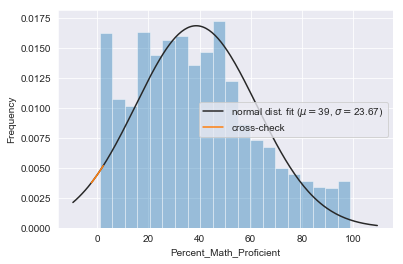

In [19]:
ax = sns.distplot(math['Percent_Math_Proficient'], bins=20, kde=False, fit=stats.norm);

# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(math['Percent_Math_Proficient'])
#print 'mu={0}, sigma={1}'.format(mu, sigma)

# Legend and labels 
plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency')
# Cross-check this is indeed the case - should be overlaid over black curve
x_dummy = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
ax.plot(x_dummy, stats.norm.pdf(x_dummy, mu, sigma))
plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma),
           "cross-check"])

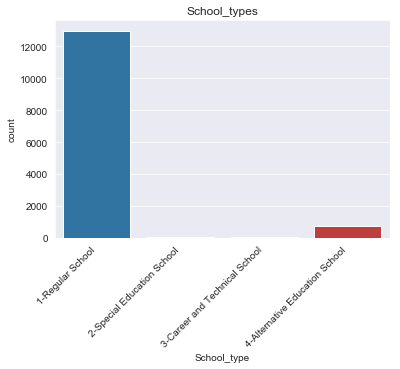

In [20]:
sns.set_style('darkgrid')
Type_plt = sns.countplot(x='School_type', data=math)
Type_plt.set_title('School_types')
Type_plt.set_xticklabels(Type_plt.get_xticklabels(), rotation=45, horizontalalignment='right')
Type_plt.set_xticklabels(["1-Regular School", "2-Special Education School", "3-Career and Technical School", "4-Alternative Education School"])
plt.savefig('/Users/dansa/Documents/Type_M_dist.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
math['Pct_certified_teachers']=(math['Certified_FTE_teachers']/math['FTE_teachcount']*100) # lets find the percent of certified teachers

In [22]:
math['Pct_noncertified_teachers']=(math['Noncertified_FTE_teachers']/math['FTE_teachcount']*100) # lets find the percent of noncertified teachers

In [23]:
math['Salary_perFTE_teacher'] = math['SalaryforTeachers']/math['FTE_teachers_count'] # Lets find the salary per FTE in each school

In [24]:
math['IPR_estimate'] = math['Income_Poverty_ratio'] #Income poverty ratio is reported as a percent 

In [25]:
#math['Percent_Reading_Proficient'] = math['Percent_Reading_Proficient']/100

In [26]:
math_clean=math.drop(['School_ID','Certified_FTE_teachers', 'Noncertified_FTE_teachers','FTE_teachcount','FTE_teachers_count','SalaryforTeachers','Income_Poverty_ratio' ], axis=1)

In [27]:
math_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13799 entries, 0 to 13799
Data columns (total 22 columns):
School_type                        13799 non-null int64
TITLEI_STATUS                      13799 non-null object
TEACHERS                           13799 non-null float64
No.FARMS_students                  13799 non-null float64
Total_enroll_students              13799 non-null float64
Students_participate_SAT_ACT       13799 non-null float64
IB_Indicator                       13799 non-null float64
Total_IB_students                  13799 non-null float64
AP_Indicator                       13799 non-null float64
No.ofAP_courses_offer              13799 non-null float64
Students_enroll_inAPMath?          13799 non-null float64
Total_AP_math_students             13799 non-null float64
Total_students_tookAP              13799 non-null float64
No.ofAlg1classes                   13799 non-null float64
Alg1_taught_by_certmathteahcers    13799 non-null float64
Total_Alg1_enroll_studen

In [28]:
math_clean['School_type'] = math_clean['School_type'].astype(float)

In [29]:
math_clean.describe()

,School_type,TEACHERS,No.FARMS_students,Total_enroll_students,Students_participate_SAT_ACT,IB_Indicator,Total_IB_students,AP_Indicator,No.ofAP_courses_offer,Students_enroll_inAPMath?,...,Total_students_tookAP,No.ofAlg1classes,Alg1_taught_by_certmathteahcers,Total_Alg1_enroll_students,Total_Alg1_pass_students,Percent_Math_Proficient,Pct_certified_teachers,Pct_noncertified_teachers,Salary_perFTE_teacher,IPR_estimate
count,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,...,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000
mean,1.167693,50.533814,394.697079,848.368867,207.202478,0.052685,9.991304,0.716429,7.879049,0.584753,...,129.031234,11.168418,9.401841,171.423944,132.788246,38.687079,97.275281,2.724174,59430.974554,294.692297
std,0.679348,41.102386,442.333664,768.024489,236.872239,0.223412,63.727740,0.450748,8.472251,0.492783,...,210.044847,13.142381,11.940747,178.016177,141.517814,23.670868,7.894882,7.810102,19042.696120,140.501133
min,1.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.380548,48.000000
25%,1.000000,19.025000,101.000000,259.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,3.000000,43.000000,30.000000,20.000000,98.082439,0.000000,47447.865314,204.000000
50%,1.000000,37.130000,228.000000,559.000000,117.000000,0.000000,0.000000,1.000000,5.000000,1.000000,...,34.000000,7.000000,6.000000,104.000000,81.000000,37.000000,100.000000,0.000000,55849.020227,263.000000
75%,1.000000,74.175000,528.000000,1277.000000,291.000000,0.000000,0.000000,1.000000,13.000000,1.000000,...,174.000000,15.000000,13.000000,248.500000,195.000000,52.000000,100.000000,1.923077,67735.690637,343.000000
max,4.000000,302.000000,4329.000000,4996.000000,2788.000000,1.000000,1335.000000,1.000000,82.000000,1.000000,...,3162.000000,472.000000,472.000000,1523.000000,1345.000000,99.000000,179.153094,100.000000,248541.032579,979.000000


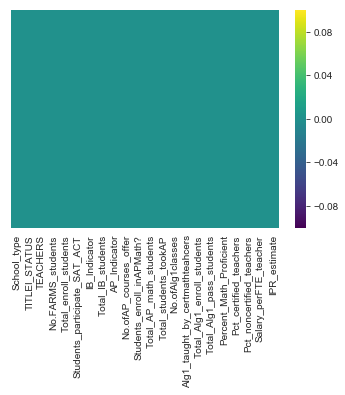

In [30]:
sns.heatmap(math_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [31]:
math_clean.shape

(13799, 22)

#### Let's create Labels for Math Proficiency based on the percent distribution of the schools

In [32]:
math_clean[['Percent_Math_Proficient']].describe()

,Percent_Math_Proficient
count,13799.000000
mean,38.687079
std,23.670868
min,1.000000
25%,20.000000
50%,37.000000
75%,52.000000
max,99.000000


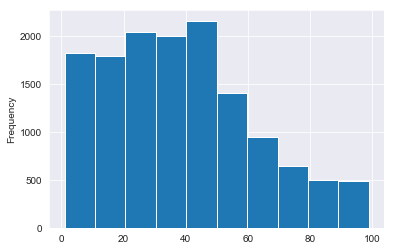

In [33]:
math_clean['Percent_Math_Proficient'].plot(kind='hist')

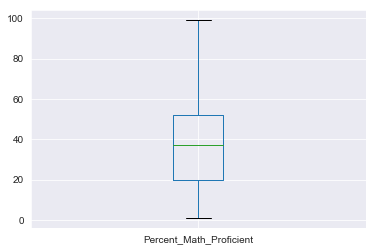

In [34]:
boxplot = math_clean.boxplot(column=['Percent_Math_Proficient'])
boxplot.plot()

plt.show()

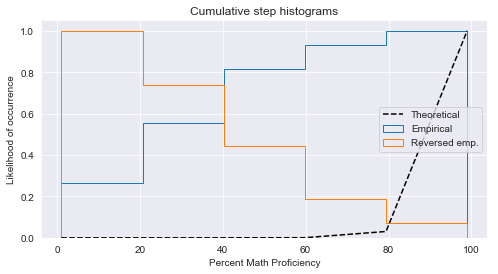

In [35]:
mu = 200
sigma = 25
n_bins = 5


fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(math_clean.Percent_Math_Proficient, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
ax.hist(math_clean.Percent_Math_Proficient, bins=bins, density=True, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Percent Math Proficiency')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

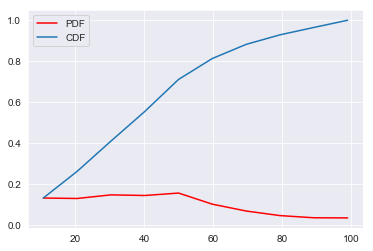

In [36]:
# getting data of the histogram
count, bins_count = np.histogram(math_clean.Percent_Math_Proficient, bins=10)
  
# finding the Probability Distribution Function of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the Cumulative Distribution Function
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

Text(0,0.5,'Frequency')

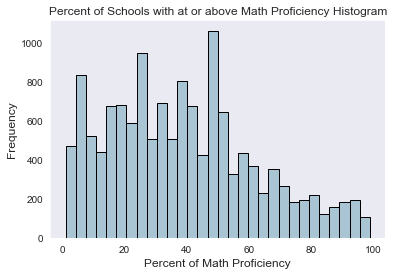

In [37]:
fig, ax = plt.subplots()
math_clean['Percent_Math_Proficient'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Percent of Schools with at or above Math Proficiency Histogram', fontsize=12)
ax.set_xlabel('Percent of Math Proficiency', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [38]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = math_clean['Percent_Math_Proficient'].quantile(quantile_list)
quantiles

0.00     1.0
0.25    20.0
0.50    37.0
0.75    52.0
1.00    99.0
Name: Percent_Math_Proficient, dtype: float64

Text(0,0.5,'Frequency')

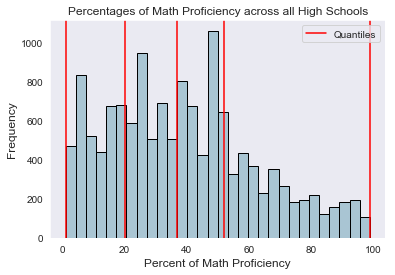

In [39]:
fig, ax = plt.subplots()
math_clean['Percent_Math_Proficient'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Percentages of Math Proficiency across all High Schools', fontsize=12)
ax.set_xlabel('Percent of Math Proficiency', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [40]:
pd.qcut(math_clean['Percent_Math_Proficient'], q=4, precision = 0).value_counts(ascending=True)

(37.0, 52.0]    3053
(52.0, 99.0]    3415
(0.0, 20.0]     3620
(20.0, 37.0]    3711
Name: Percent_Math_Proficient, dtype: int64

In [41]:
quantile_labels = ['Low', 'Moderate','High','Very High']
quantile_numeric = [1,2,3,4]
math_clean['Percent_Math_Proficient_quantile_range'] = pd.qcut(
                                            math_clean['Percent_Math_Proficient'], 
                                            q=quantile_list)
math_clean['Percent_Math_Proficient_quantile_label'] = pd.qcut(
                                            math_clean['Percent_Math_Proficient'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)
math_clean['Percent_Math_Proficient_quantile_encoded'] = pd.qcut(
                                            math_clean['Percent_Math_Proficient'], 
                                            q=quantile_list,
                                            labels=quantile_numeric,
                                            precision=0)

math_clean.head()

,School_type,TITLEI_STATUS,TEACHERS,No.FARMS_students,Total_enroll_students,Students_participate_SAT_ACT,IB_Indicator,Total_IB_students,AP_Indicator,No.ofAP_courses_offer,...,Total_Alg1_enroll_students,Total_Alg1_pass_students,Percent_Math_Proficient,Pct_certified_teachers,Pct_noncertified_teachers,Salary_perFTE_teacher,IPR_estimate,Percent_Math_Proficient_quantile_range,Percent_Math_Proficient_quantile_label,Percent_Math_Proficient_quantile_encoded
0,1.0,SWELIGSWPROG,77.00,832.0,1449.0,363.0,0.0,0.0,1.0,8.0,...,450.0,428.0,37.0,91.045158,8.954842,51879.203348,248.0,"(20.0, 37.0]",Moderate,2
1,1.0,SWELIGSWPROG,28.64,450.0,547.0,61.0,0.0,0.0,1.0,3.0,...,63.0,62.0,34.0,96.875000,3.125000,48494.496562,241.0,"(20.0, 37.0]",Moderate,2
2,1.0,SWELIGSWPROG,30.87,429.0,591.0,142.0,0.0,0.0,1.0,6.0,...,117.0,113.0,37.0,100.000000,0.000000,45971.525833,213.0,"(20.0, 37.0]",Moderate,2
3,1.0,SWELIGSWPROG,24.04,211.0,452.0,103.0,0.0,0.0,1.0,6.0,...,105.0,105.0,57.0,100.000000,0.000000,43328.431379,254.0,"(52.0, 99.0]",Very High,4
4,1.0,SWELIGSWPROG,31.26,415.0,632.0,76.0,0.0,0.0,1.0,5.0,...,161.0,149.0,31.0,97.297297,2.702703,41629.406757,329.0,"(20.0, 37.0]",Moderate,2


In [42]:
math_clean['Percent_Math_Proficient_quantile_label'].value_counts(ascending=True)

High         3053
Very High    3415
Low          3620
Moderate     3711
Name: Percent_Math_Proficient_quantile_label, dtype: int64

In [43]:
math_clean['Percent_Math_Proficient_quantile_encoded'] = math_clean['Percent_Math_Proficient_quantile_encoded'].astype(float)

### 3. Looking for Correlations and Visualizing
We should calculate data correlations and plot a scatter matrix.

For training the ML models, we'll want to separate the Percent_Math_Proficient from the rest of the data. But for investigating correlations, we'll want to include the target.

In [44]:
math_clean1=math_clean[['School_type', 'TITLEI_STATUS', 'TEACHERS', 'No.FARMS_students',
       'Total_enroll_students', 'Students_participate_SAT_ACT', 'IB_Indicator',
       'Total_IB_students', 'AP_Indicator', 'No.ofAP_courses_offer',
       'Students_enroll_inAPMath?', 'Total_AP_math_students','Total_students_tookAP', 
       'No.ofAlg1classes','Alg1_taught_by_certmathteahcers', 'Total_Alg1_enroll_students','Total_Alg1_pass_students',
       'Pct_certified_teachers', 'Pct_noncertified_teachers',
       'Salary_perFTE_teacher', 'IPR_estimate','Percent_Math_Proficient_quantile_encoded']]

In [45]:
math_clean1.dtypes

School_type                                 float64
TITLEI_STATUS                                object
TEACHERS                                    float64
No.FARMS_students                           float64
Total_enroll_students                       float64
Students_participate_SAT_ACT                float64
IB_Indicator                                float64
Total_IB_students                           float64
AP_Indicator                                float64
No.ofAP_courses_offer                       float64
Students_enroll_inAPMath?                   float64
Total_AP_math_students                      float64
Total_students_tookAP                       float64
No.ofAlg1classes                            float64
Alg1_taught_by_certmathteahcers             float64
Total_Alg1_enroll_students                  float64
Total_Alg1_pass_students                    float64
Pct_certified_teachers                      float64
Pct_noncertified_teachers                   float64
Salary_perFT

In [46]:
correlation_matrix = math_clean1.corr()

In [47]:
correlation_matrix['Percent_Math_Proficient_quantile_encoded'].sort_values(ascending=False)

Percent_Math_Proficient_quantile_encoded    1.000000
IPR_estimate                                0.328973
Total_students_tookAP                       0.242976
Total_AP_math_students                      0.227815
No.ofAP_courses_offer                       0.209265
Students_participate_SAT_ACT                0.191003
TEACHERS                                    0.175162
Total_enroll_students                       0.146185
Students_enroll_inAPMath?                   0.146002
AP_Indicator                                0.132529
Salary_perFTE_teacher                       0.113433
Pct_certified_teachers                      0.093385
Total_Alg1_pass_students                    0.074551
Alg1_taught_by_certmathteahcers             0.069355
Total_Alg1_enroll_students                  0.024936
IB_Indicator                                0.022484
No.ofAlg1classes                            0.012569
Total_IB_students                           0.010085
Pct_noncertified_teachers                  -0.

It seems like a few features (IPR_estimate, Total_students_tookAP, Total_AP_math_students have a weak to moderate positive correlation to the target (Percent_Math_Proficient), and a couple are somewhat negatively correlated (School_type).

IPR_estimate is the Neighborhood Income Poverty Ratio.
Total_students_tookAP is the count of students who the AP exam.
Total_AP_math_students is the number of students who took an AP math course.
School_type is refers to whether the school is a "1-Regular School, 2-Special Education School, 3-Career and Technical School and 4-Alternative Education School"

We can look at a heatmap of the correlations of all numeric features to visualize which features are correlated.

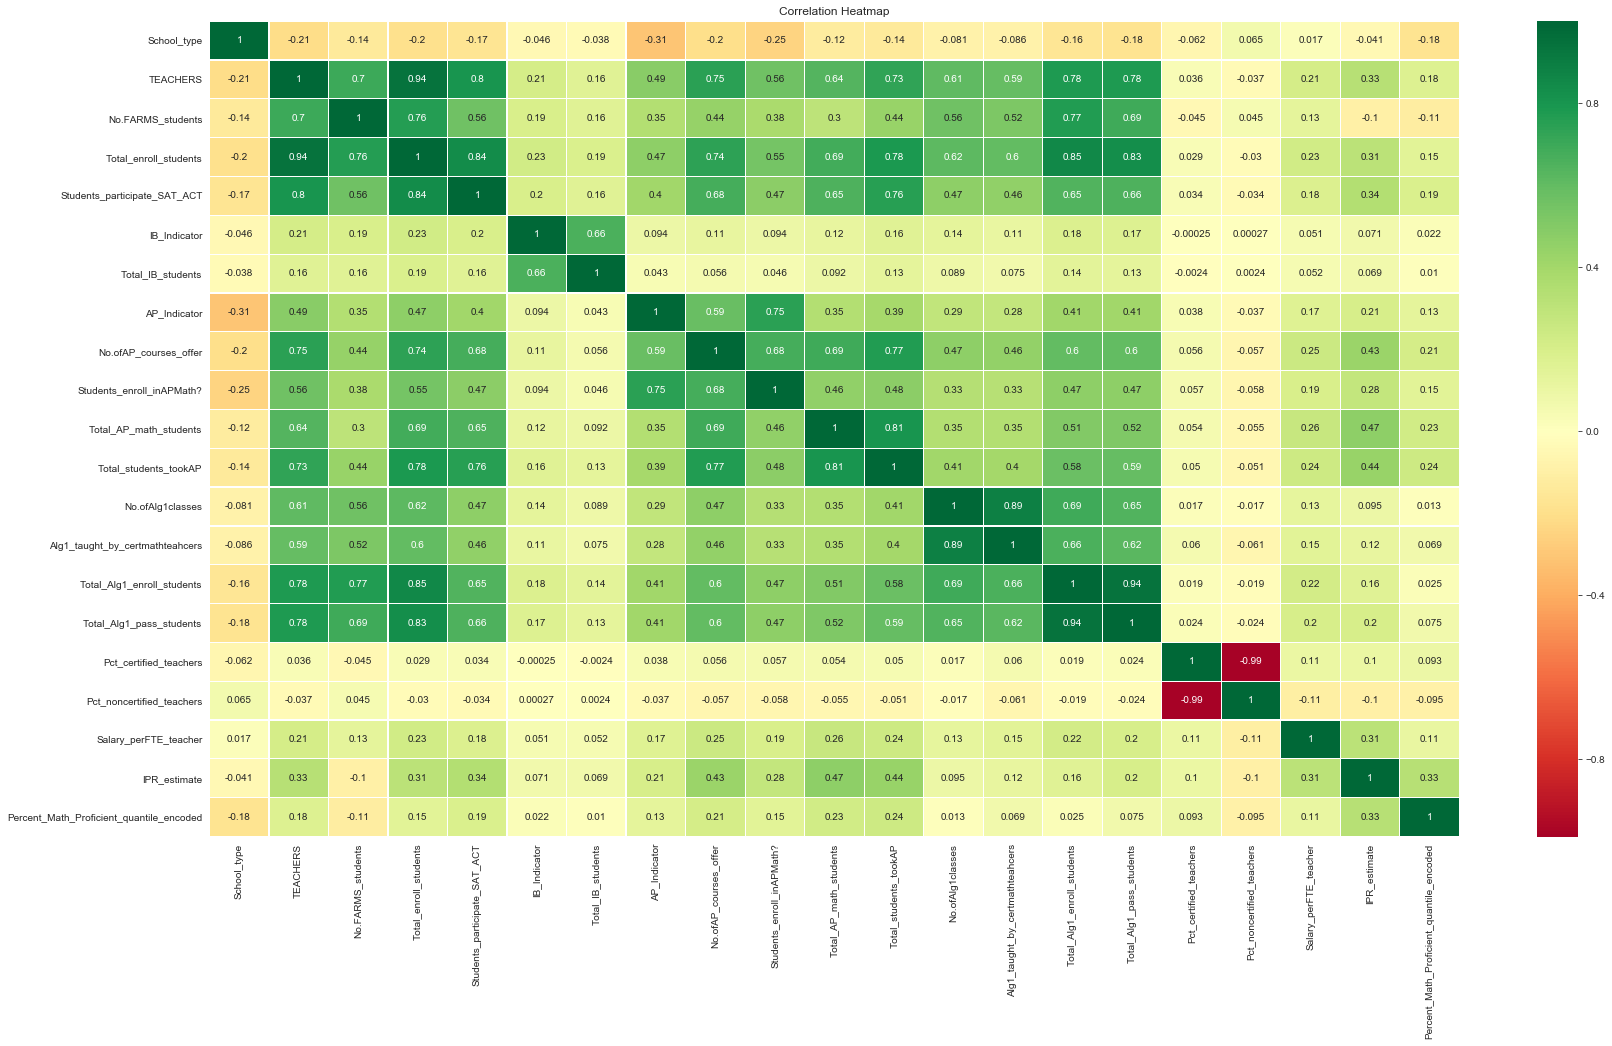

In [48]:
# correlation matrix heatmap
plt.figure(figsize=(28,15))
corr_heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=0.2, center=0, cmap="RdYlGn")
corr_heatmap.set_title('Correlation Heatmap')
plt.savefig('/Users/dansa/Documents/corr_heatmap.png', dpi=300, bbox_inches='tight')

In [49]:
#test
corr_pairs = {}
feats = correlation_matrix.columns
for x in feats:
    for y in feats:
        if x != y and np.abs(correlation_matrix[x][y]) >= 0.7:  # which pairs are strongely correlated?
            if (y, x) not in corr_pairs.keys():
                corr_pairs[(x, y)] = correlation_matrix[x][y]

In [50]:
corr_pairs

{('TEACHERS', 'No.FARMS_students'): 0.7017086490804209,
 ('TEACHERS', 'Total_enroll_students'): 0.938406324099637,
 ('TEACHERS', 'Students_participate_SAT_ACT'): 0.8006030587787448,
 ('TEACHERS', 'No.ofAP_courses_offer'): 0.7502889280050299,
 ('TEACHERS', 'Total_students_tookAP'): 0.7337755312720665,
 ('TEACHERS', 'Total_Alg1_enroll_students'): 0.7791810513224016,
 ('TEACHERS', 'Total_Alg1_pass_students'): 0.7777312626768963,
 ('No.FARMS_students', 'Total_enroll_students'): 0.7626556465671063,
 ('No.FARMS_students', 'Total_Alg1_enroll_students'): 0.7677866551722557,
 ('Total_enroll_students', 'Students_participate_SAT_ACT'): 0.8386079499694518,
 ('Total_enroll_students', 'No.ofAP_courses_offer'): 0.7435334085186153,
 ('Total_enroll_students', 'Total_students_tookAP'): 0.7828564684209866,
 ('Total_enroll_students', 'Total_Alg1_enroll_students'): 0.8525157891758104,
 ('Total_enroll_students', 'Total_Alg1_pass_students'): 0.831934337567597,
 ('Students_participate_SAT_ACT', 'Total_student

In [51]:
weaker_label = []
for pair in corr_pairs:
    if np.abs(correlation_matrix[pair[0]]['Percent_Math_Proficient_quantile_encoded']) < np.abs(correlation_matrix[pair[1]]['Percent_Math_Proficient_quantile_encoded']):
        weaker_label.append(pair[0])
    else:
        weaker_label.append(pair[1])

In [52]:
poss_redundant_feats = set(weaker_label)
poss_redundant_feats

{'AP_Indicator',
 'No.FARMS_students',
 'No.ofAP_courses_offer',
 'No.ofAlg1classes',
 'Pct_certified_teachers',
 'Students_participate_SAT_ACT',
 'TEACHERS',
 'Total_AP_math_students',
 'Total_Alg1_enroll_students',
 'Total_Alg1_pass_students',
 'Total_enroll_students'}

In [ ]:
# cov_matrix = math_clean1.cov()
# plt.figure(figsize=(28,15))
# covar_heatmap = sns.heatmap(data=cov_matrix, cmap='coolwarm', linewidth=0.2) 
# covar_heatmap.set_title('Covariance Heatmap')
# plt.savefig('/Users/dansa/Documents/covar_heatmap.png', dpi=300, bbox_inches='tight')

In [54]:
attrs = ['IPR_estimate','Total_AP_math_students','Total_students_tookAP','Percent_Math_Proficient_quantile_encoded']

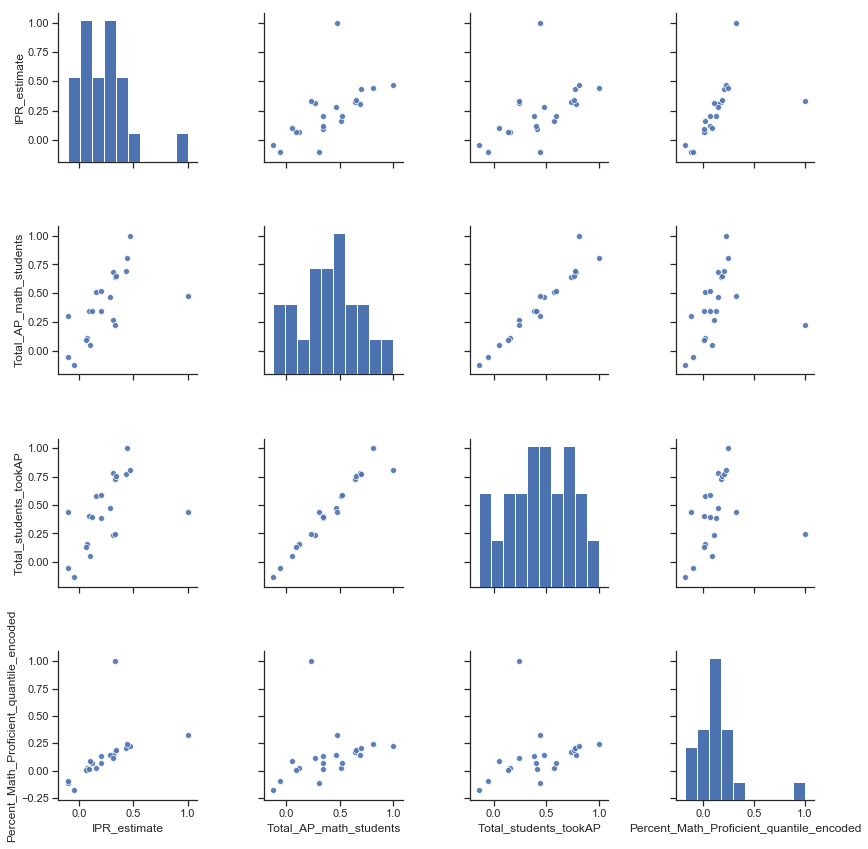

In [55]:
sns.set(style='ticks', color_codes=True)
_ = sns.pairplot(data=correlation_matrix[attrs], height=3, aspect=1, kind='scatter', plot_kws={'alpha':0.9})

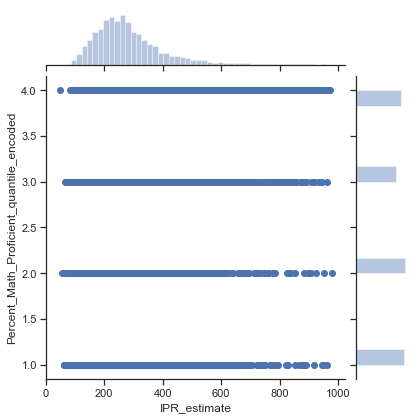

In [56]:
sns.jointplot(x="IPR_estimate", y="Percent_Math_Proficient_quantile_encoded", data=math_clean1)

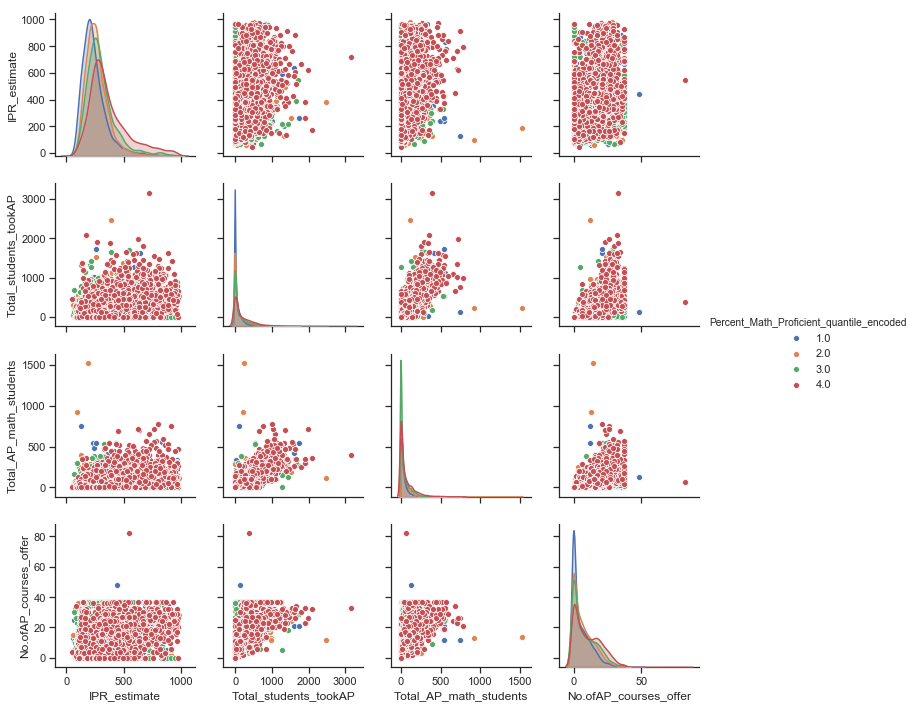

In [57]:
sns.pairplot(math_clean1, hue = 'Percent_Math_Proficient_quantile_encoded',vars = ['IPR_estimate','Total_students_tookAP','Total_AP_math_students','No.ofAP_courses_offer'] )

### ML prep
#### Separate labels
Let's separate out the target from the predicting features.

In [58]:
X = math_clean1.drop('Percent_Math_Proficient_quantile_encoded', axis=1)
y = math_clean1.Percent_Math_Proficient_quantile_encoded

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11039, 21)
(2760, 21)
(11039,)
(2760,)


#### Transform Categorical Features
Since these categorical features don't appear to have an inherent ordering, let's try encoding them as one-hot vectors for better ML performance.

In [61]:
train_data_onehot = pd.get_dummies(X_train, columns=['TITLEI_STATUS'], prefix=['TITLEI_STATUS'])
train_data_onehot.head()

test_data_onehot = pd.get_dummies(X_test, columns=['TITLEI_STATUS'], prefix=['TITLEI_STATUS'])

#### Scale Features
We can check out the statistics for each feature, do they need to be normalized?

In [62]:
train_data_onehot.describe()

,School_type,TEACHERS,No.FARMS_students,Total_enroll_students,Students_participate_SAT_ACT,IB_Indicator,Total_IB_students,AP_Indicator,No.ofAP_courses_offer,Students_enroll_inAPMath?,...,Pct_certified_teachers,Pct_noncertified_teachers,Salary_perFTE_teacher,IPR_estimate,TITLEI_STATUS_NOTTITLE1ELIG,TITLEI_STATUS_SWELIGNOPROG,TITLEI_STATUS_SWELIGSWPROG,TITLEI_STATUS_SWELIGTGPROG,TITLEI_STATUS_TGELGBNOPROG,TITLEI_STATUS_TGELGBTGPROG
count,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000,...,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000,11039.000000
mean,1.175016,50.649365,392.638011,849.636108,207.954706,0.052722,9.916840,0.717275,7.924721,0.583930,...,97.306677,2.696333,59577.380002,295.802428,0.331642,0.168856,0.285714,0.014222,0.134704,0.064861
std,0.692927,41.318325,439.238971,769.952506,238.621822,0.223488,62.124717,0.450344,8.508389,0.492928,...,7.886705,7.791150,19132.819952,141.469226,0.470825,0.374642,0.451774,0.118412,0.341423,0.246291
min,1.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.291865,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,101.000000,257.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,98.076823,0.000000,47477.366142,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,37.310000,228.000000,559.000000,116.000000,0.000000,0.000000,1.000000,5.000000,1.000000,...,100.000000,0.000000,55931.458234,264.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,74.235000,523.000000,1277.500000,292.000000,0.000000,0.000000,1.000000,13.000000,1.000000,...,100.000000,1.932395,67965.007650,345.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,4.000000,302.000000,4329.000000,4996.000000,2788.000000,1.000000,1249.000000,1.000000,82.000000,1.000000,...,179.153094,100.000000,248541.032579,979.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
sc= StandardScaler()

X_train_scaled = sc.fit_transform(train_data_onehot)

X_test_scaled = sc.transform(test_data_onehot)

In [64]:
print(X_train_scaled)
print(X_train_scaled.mean(axis=0))

[[-0.25258623 -0.97247856 -0.78466084 ... -0.12011451 -0.39455571
  -0.26336226]
 [-0.25258623 -0.26791663 -0.32703045 ... -0.12011451 -0.39455571
  -0.26336226]
 [-0.25258623  1.40502464  0.19890299 ... -0.12011451  2.53449636
  -0.26336226]
 ...
 [-0.25258623 -0.51575978 -0.28832539 ... -0.12011451 -0.39455571
  -0.26336226]
 [-0.25258623  0.69659017  0.13970702 ... -0.12011451 -0.39455571
  -0.26336226]
 [-0.25258623  2.38042299  2.85133788 ... -0.12011451 -0.39455571
  -0.26336226]]
[ 8.36765610e-17 -1.08135863e-16  3.21832927e-17 -2.31719707e-17
  4.89186049e-17 -4.37692780e-17  5.14932683e-18  6.62975829e-17
  6.17919219e-17  1.54479805e-17 -3.92636171e-17 -1.80226439e-17
 -5.53552634e-17  6.11482561e-17 -3.79762854e-17 -4.44129439e-17
 -1.90525093e-15  1.35169829e-17  4.31899788e-16  7.65962366e-17
  2.63903000e-17 -3.99072829e-17 -2.60684671e-17 -5.14932683e-18
  3.66889537e-17 -1.54479805e-17]


In [65]:
print(X_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [66]:
X_train_std = pd.DataFrame(X_train_scaled, columns=train_data_onehot.columns)
X_test_std = pd.DataFrame(X_test_scaled, columns=test_data_onehot.columns)

That should work better, the standard deviation for each feature is 1 and the mean is ~0.

### Classification models

#### Logistic Regression

In [67]:
lr=LogisticRegression()

In [68]:
lr.fit(X_train_std,y_train)
lr_pred=lr.predict(X_test_std)

In [69]:
print("Predicted Levels: ",list(lr_pred[:10]))
print("Actual Levels: ",list(y_test[:10]))

Predicted Levels:  [4.0, 1.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0, 1.0, 1.0]
Actual Levels:  [2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0]


In [70]:
intercept = lr.intercept_

In [71]:
coefficients = lr.coef_

In [72]:
coef_list = list(coefficients[0,:])

In [73]:
coef_df = pd.DataFrame({'Feature': list(X_train_std.columns),

'Coefficient': coef_list})

print(coef_df)

                            Feature  Coefficient
0                       School_type     0.391513
1                          TEACHERS    -0.485204
2                 No.FARMS_students     0.721559
3             Total_enroll_students    -0.321698
4      Students_participate_SAT_ACT    -0.073571
5                      IB_Indicator     0.046932
6                 Total_IB_students     0.011629
7                      AP_Indicator    -0.042018
8             No.ofAP_courses_offer     0.239723
9         Students_enroll_inAPMath?    -0.055494
10           Total_AP_math_students     0.105033
11            Total_students_tookAP    -0.585994
12                 No.ofAlg1classes     0.375207
13  Alg1_taught_by_certmathteahcers    -0.698908
14       Total_Alg1_enroll_students     0.354679
15         Total_Alg1_pass_students    -0.006627
16           Pct_certified_teachers    -0.012750
17        Pct_noncertified_teachers     0.054051
18            Salary_perFTE_teacher    -0.012094
19                  

In [74]:
predicted_prob = lr.predict_proba(X_test_std)[:,1]

In [75]:
cm = pd.DataFrame(confusion_matrix(y_test, lr_pred))

cm['Total'] = np.sum(cm, axis=1)

cm = cm.append(np.sum(cm, axis=0), ignore_index=True)

cm.columns = ['1','2','3','4', 'Total']

cm = cm.set_index([['1','2','3','4', 'Total']])

print(cm)

         1    2    3    4  Total
1      401  218   24   98    741
2      175  385   54  152    766
3      124  212   50  197    583
4       78  166   43  383    670
Total  778  981  171  830   2760


In [76]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

         1.0       0.52      0.54      0.53       741
         2.0       0.39      0.50      0.44       766
         3.0       0.29      0.09      0.13       583
         4.0       0.46      0.57      0.51       670

   micro avg       0.44      0.44      0.44      2760
   macro avg       0.42      0.43      0.40      2760
weighted avg       0.42      0.44      0.42      2760



#### SVC

In [77]:
from sklearn import svm
svc = svm.SVC(kernel='linear')

In [78]:
svc.fit(X_train_std,y_train)
svc_pred=svc.predict(X_test_std)

In [79]:
print("Predicted Levels: ",list(svc_pred[:10]))
print("Actual Levels: ",list(y_test[:10]))

Predicted Levels:  [4.0, 2.0, 2.0, 2.0, 4.0, 4.0, 1.0, 4.0, 1.0, 1.0]
Actual Levels:  [2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0]


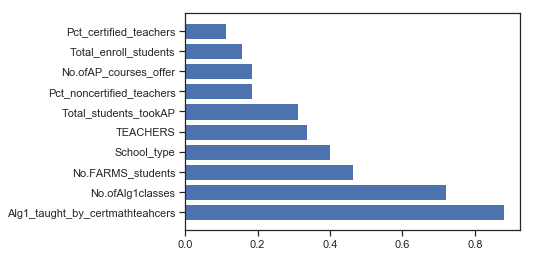

In [80]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

f_importances(abs(svc.coef_[0]), X_train_std.columns, top=10)

In [81]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

         1.0       0.57      0.39      0.46       741
         2.0       0.36      0.64      0.46       766
         3.0       0.32      0.04      0.08       583
         4.0       0.45      0.53      0.48       670

   micro avg       0.42      0.42      0.42      2760
   macro avg       0.42      0.40      0.37      2760
weighted avg       0.43      0.42      0.38      2760



#### Knn Classifier

In [82]:
knn=KNeighborsClassifier()

In [83]:
knn.fit(X_train_std,y_train)
knn_pred=knn.predict(X_test_std)

In [84]:
print("Predicted Levels: ",list(knn_pred[:10]))
print("Actual Levels: ",list(y_test[:10]))

Predicted Levels:  [2.0, 1.0, 1.0, 1.0, 2.0, 4.0, 1.0, 4.0, 1.0, 1.0]
Actual Levels:  [2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0]


In [85]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         1.0       0.47      0.56      0.51       741
         2.0       0.38      0.43      0.40       766
         3.0       0.31      0.25      0.27       583
         4.0       0.51      0.41      0.46       670

   micro avg       0.42      0.42      0.42      2760
   macro avg       0.42      0.41      0.41      2760
weighted avg       0.42      0.42      0.42      2760



#### Decision Trees

In [86]:
dt=DecisionTreeClassifier()

In [87]:
dt.fit(X_train_std,y_train)
dt_pred=dt.predict(X_test_std)

In [88]:
print("Predicted Levels: ",list(dt_pred[:10]))
print("Actual Levels: ",list(y_test[:10]))

Predicted Levels:  [3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 4.0, 1.0, 2.0]
Actual Levels:  [2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0]


In [89]:
dt_feature_imp = pd.Series(dt.feature_importances_,index=X_train_std.columns).sort_values(ascending=False)
dt_feature_imp

IPR_estimate                       0.115973
Salary_perFTE_teacher              0.102395
No.FARMS_students                  0.099875
TEACHERS                           0.086328
Students_participate_SAT_ACT       0.077254
Total_enroll_students              0.076225
Total_Alg1_enroll_students         0.063971
Total_Alg1_pass_students           0.056941
Total_students_tookAP              0.055659
Alg1_taught_by_certmathteahcers    0.043112
Total_AP_math_students             0.039447
No.ofAP_courses_offer              0.036951
No.ofAlg1classes                   0.031776
Pct_noncertified_teachers          0.024298
School_type                        0.019158
Pct_certified_teachers             0.019060
TITLEI_STATUS_NOTTITLE1ELIG        0.011452
TITLEI_STATUS_SWELIGSWPROG         0.008827
TITLEI_STATUS_TGELGBNOPROG         0.008137
TITLEI_STATUS_SWELIGNOPROG         0.006185
Total_IB_students                  0.005194
Students_enroll_inAPMath?          0.003629
TITLEI_STATUS_TGELGBTGPROG      

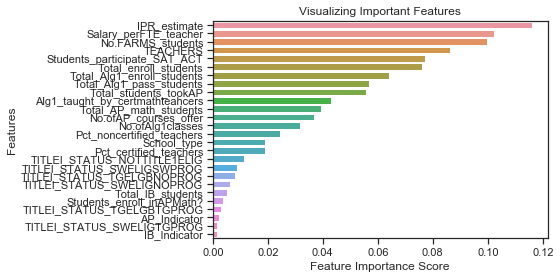

In [90]:
sns.barplot(x=dt_feature_imp, y=dt_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [91]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         1.0       0.49      0.47      0.48       741
         2.0       0.37      0.38      0.37       766
         3.0       0.25      0.26      0.26       583
         4.0       0.41      0.42      0.41       670

   micro avg       0.39      0.39      0.39      2760
   macro avg       0.38      0.38      0.38      2760
weighted avg       0.39      0.39      0.39      2760



#### Gaussian RandomForestClassifier

In [92]:
rf=RandomForestClassifier(n_estimators=2000, max_depth=2)

In [93]:
rf.fit(X_train_std,y_train)
rf_pred=rf.predict(X_test_std)

In [94]:
print("Predicted Levels: ",list(rf_pred[:10]))
print("Actual Levels: ",list(y_test[:10]))

Predicted Levels:  [1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 2.0, 1.0, 1.0]
Actual Levels:  [2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0]


In [95]:
rf_feature_imp = pd.Series(rf.feature_importances_,index=X_train_std.columns).sort_values(ascending=False)
rf_feature_imp

IPR_estimate                       0.230955
School_type                        0.140337
Total_students_tookAP              0.120767
TITLEI_STATUS_SWELIGSWPROG         0.090491
Total_AP_math_students             0.072193
TITLEI_STATUS_NOTTITLE1ELIG        0.061062
Total_enroll_students              0.059175
TEACHERS                           0.051756
No.FARMS_students                  0.038223
No.ofAP_courses_offer              0.036266
Students_participate_SAT_ACT       0.032596
Salary_perFTE_teacher              0.016620
Pct_certified_teachers             0.010702
Pct_noncertified_teachers          0.009717
Total_Alg1_enroll_students         0.007205
AP_Indicator                       0.005984
Students_enroll_inAPMath?          0.005590
Total_Alg1_pass_students           0.004333
No.ofAlg1classes                   0.002897
Alg1_taught_by_certmathteahcers    0.002162
TITLEI_STATUS_SWELIGNOPROG         0.000725
TITLEI_STATUS_TGELGBNOPROG         0.000166
TITLEI_STATUS_TGELGBTGPROG      

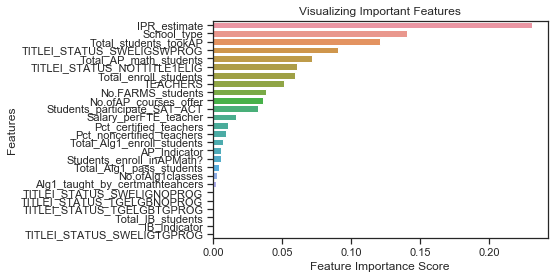

In [96]:
#Feature importance for Random Forest Model
# Creating a bar plot
sns.barplot(x=rf_feature_imp, y=rf_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [97]:
print(classification_report(y_test, rf_pred, labels=[1, 2, 3, 4]))

              precision    recall  f1-score   support

           1       0.48      0.55      0.51       741
           2       0.34      0.46      0.39       766
           3       0.53      0.06      0.11       583
           4       0.44      0.53      0.48       670

   micro avg       0.42      0.42      0.42      2760
   macro avg       0.45      0.40      0.37      2760
weighted avg       0.44      0.42      0.39      2760



#### GradientBoostingClassifier

In [150]:
#Fitting model
gb= GradientBoostingClassifier()# for parametes (n_estimators=2000, max_depth=2)
gb.fit(X_train_std,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [151]:
gb_pred=gb.predict(X_test_std)

In [132]:
print("Predicted: ",list(gb_pred[:10]))
print("Actual: ",list(y_test[:10]))

Predicted:  [2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 1.0, 1.0]
Actual:  [2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0]


In [133]:
gb_feature_imp = pd.Series(gb.feature_importances_,index=X_train_std.columns).sort_values(ascending=False)
gb_feature_imp

IPR_estimate                       0.175972
No.FARMS_students                  0.133987
TEACHERS                           0.098520
Total_enroll_students              0.085069
Total_students_tookAP              0.083769
School_type                        0.076885
Salary_perFTE_teacher              0.063073
Students_participate_SAT_ACT       0.039006
Total_Alg1_enroll_students         0.036445
Alg1_taught_by_certmathteahcers    0.032948
TITLEI_STATUS_NOTTITLE1ELIG        0.027530
Pct_certified_teachers             0.023510
Total_AP_math_students             0.021761
Total_Alg1_pass_students           0.016752
No.ofAlg1classes                   0.016444
Pct_noncertified_teachers          0.015044
No.ofAP_courses_offer              0.014310
TITLEI_STATUS_SWELIGSWPROG         0.013032
TITLEI_STATUS_SWELIGTGPROG         0.006826
TITLEI_STATUS_TGELGBNOPROG         0.006218
Total_IB_students                  0.005405
TITLEI_STATUS_SWELIGNOPROG         0.003832
Students_enroll_inAPMath?       

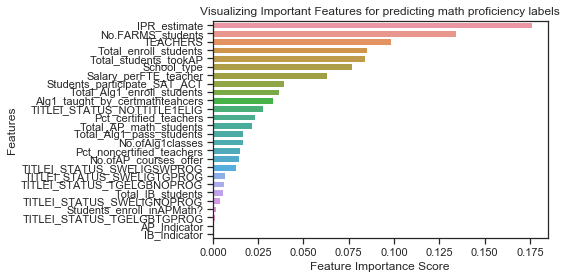

In [148]:
#Feature importance for Gradient Boosting classfier Model
# Creating a bar plot
sns.barplot(x=gb_feature_imp, y=gb_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for predicting math proficiency labels")
#plt.legend()
plt.show()

In [135]:
print(classification_report(y_test, gb_pred, labels=[1, 2, 3, 4]))

              precision    recall  f1-score   support

           1       0.59      0.58      0.59       741
           2       0.41      0.56      0.48       766
           3       0.40      0.17      0.24       583
           4       0.52      0.58      0.55       670

   micro avg       0.49      0.49      0.49      2760
   macro avg       0.48      0.47      0.46      2760
weighted avg       0.48      0.49      0.47      2760



#### ExtraTreesClassifier

In [104]:
#Fitting model
et= ExtraTreesClassifier(n_estimators=2000, max_depth=2)# for parametes (n_estimators=2000, max_depth=2)
et.fit(X_train_std,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=2, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [105]:
#making predictions
et_pred=et.predict(X_test_std)

In [106]:
print("Predicted Levels: ",list(et_pred[:10]))
print("Actual Levels: ",list(y_test[:10]))

Predicted Levels:  [1.0, 2.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 1.0, 2.0]
Actual Levels:  [2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 4.0, 2.0]


In [107]:
et_feature_imp = pd.Series(et.feature_importances_,index=X_train_std.columns).sort_values(ascending=False)
et_feature_imp

School_type                        0.216416
TITLEI_STATUS_SWELIGSWPROG         0.176077
TITLEI_STATUS_NOTTITLE1ELIG        0.136380
IPR_estimate                       0.129190
Students_enroll_inAPMath?          0.078167
AP_Indicator                       0.067940
Total_students_tookAP              0.029629
Total_AP_math_students             0.025751
No.ofAP_courses_offer              0.024211
TEACHERS                           0.023186
Students_participate_SAT_ACT       0.021755
TITLEI_STATUS_SWELIGNOPROG         0.014970
Total_enroll_students              0.011698
No.FARMS_students                  0.010450
Salary_perFTE_teacher              0.008911
TITLEI_STATUS_TGELGBTGPROG         0.005954
Pct_noncertified_teachers          0.005465
TITLEI_STATUS_TGELGBNOPROG         0.003677
Total_Alg1_pass_students           0.003282
Pct_certified_teachers             0.002467
Total_Alg1_enroll_students         0.001855
TITLEI_STATUS_SWELIGTGPROG         0.000852
Alg1_taught_by_certmathteahcers 

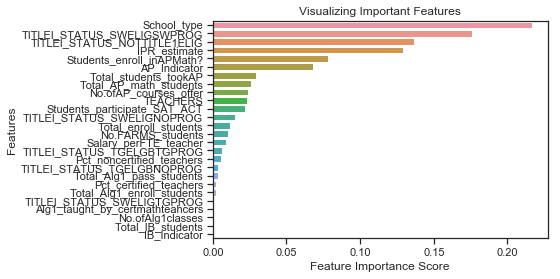

In [108]:
sns.barplot(x=et_feature_imp, y=et_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [109]:
print(classification_report(y_test, et_pred, labels=[1, 2, 3, 4]))

              precision    recall  f1-score   support

           1       0.39      0.41      0.40       741
           2       0.33      0.43      0.38       766
           3       0.00      0.00      0.00       583
           4       0.40      0.58      0.47       670

   micro avg       0.37      0.37      0.37      2760
   macro avg       0.28      0.36      0.31      2760
weighted avg       0.29      0.37      0.33      2760



In [136]:
#Computing accuracy
print("Accuracy of Logistic Regression model: %.2f" % accuracy_score(y_test,lr_pred))
print("Accuracy of SVC model: %.2f" % accuracy_score(y_test,svc_pred))
print("Accuracy of KNN model: %.2f" % accuracy_score(y_test,knn_pred))
print("Accuracy of Decision Trees model: %.2f" % accuracy_score(y_test,dt_pred))
print("Accuracy of Random forest classfier model: %.2f" % accuracy_score(y_test,rf_pred))
print("Accuracy of Gradient Boosting classfier model: %.2f" % accuracy_score(y_test,gb_pred))
print("Accuracy of Extra trees classfier model: %.2f" % accuracy_score(y_test,et_pred))

Accuracy of Logistic Regression model: 0.44
Accuracy of SVC model: 0.42
Accuracy of KNN model: 0.42
Accuracy of Decision Trees model: 0.39
Accuracy of Random forest classfier model: 0.42
Accuracy of Gradient Boosting classfier model: 0.49
Accuracy of Extra trees classfier model: 0.37


In [137]:
#Computing precision
print("Logistic Regression model: %.2f" % precision_score(y_test,lr_pred,average='weighted'))
print("SVC model: %.2f" % precision_score(y_test,svc_pred,average='weighted'))
print("KNN model: %.2f" % precision_score(y_test,knn_pred, average='weighted'))
print("Decision Trees: %.2f" % precision_score(y_test,dt_pred, average='weighted'))
print("Random forest classfier model: %.2f" % precision_score(y_test,rf_pred, average='weighted'))
print("Gradient Boosting classfier model: %.2f" % precision_score(y_test,gb_pred, average='weighted'))
print("Extra trees classfier model: %.2f" % precision_score(y_test,et_pred, average='weighted'))

Logistic Regression model: 0.42
SVC model: 0.43
KNN model: 0.42
Decision Trees: 0.39
Random forest classfier model: 0.44
Gradient Boosting classfier model: 0.48
Extra trees classfier model: 0.29


In [138]:
#Computing recall
print("Logistic Regression model: %.2f" % recall_score(y_test,lr_pred,average='weighted'))
print("SVC model: %.2f" % recall_score(y_test,svc_pred,average='weighted'))
print("KNN model: %.2f" % recall_score(y_test,knn_pred,average='weighted'))
print("Decision Trees: %.2f" % recall_score(y_test,dt_pred,average='weighted'))
print("Random forest classfier model: %.2f" % recall_score(y_test,rf_pred,average='weighted'))
print("Gradient Boosting classfier model: %.2f" % recall_score(y_test,gb_pred,average='weighted'))
print("Extra trees classfier model: %.2f" % recall_score(y_test,et_pred,average='weighted'))

Logistic Regression model: 0.44
SVC model: 0.42
KNN model: 0.42
Decision Trees: 0.39
Random forest classfier model: 0.42
Gradient Boosting classfier model: 0.49
Extra trees classfier model: 0.37


In [139]:
#Computing f1 score
print("Logistic Regression model: %.2f" % f1_score(y_test,lr_pred,average='weighted'))
print("SVC model: %.2f" % f1_score(y_test,svc_pred,average='weighted'))
print("KNN model: %.2f" % f1_score(y_test,knn_pred,average='weighted'))
print("Decision Trees: %.2f" % f1_score(y_test,dt_pred,average='weighted'))
print("Random forest classfier model: %.2f" % f1_score(y_test,rf_pred,average='weighted'))
print("Gradient Boosting classfier model: %.2f" % f1_score(y_test,gb_pred,average='weighted'))
print("Extra trees classfier model: %.2f" % f1_score(y_test,et_pred,average='weighted'))

Logistic Regression model: 0.42
SVC model: 0.38
KNN model: 0.42
Decision Trees: 0.39
Random forest classfier model: 0.39
Gradient Boosting classfier model: 0.47
Extra trees classfier model: 0.33


In [140]:
Results = {'Model Name':  ['Logistic Regression', 'SVC','KNN','Decision Trees','Random Forest','Gradient boosting','Extra Trees'],
        'Accuracy': ['0.44','0.42','0.42','0.39','0.42','0.49','0.37'],
        'Precision':  ['0.42','0.43','0.42','0.39','0.45','0.48','0.29'],
        'Recall': ['0.44','0.42','0.42','0.39','0.42','0.49','0.37'],
        'F1score': ['0.42','0.38','0.42','0.39','0.39','0.47','0.33']
        }

Summary = pd.DataFrame (Results, columns = ['Model Name','Accuracy','Precision','Recall','F1score'])
Summary.dtypes

Summary["Accuracy"] = Summary.Accuracy.astype(float)
Summary["Precision"] = Summary.Precision.astype(float)
Summary["Recall"] = Summary.Recall.astype(float)
Summary["F1score"] = Summary.F1score.astype(float)

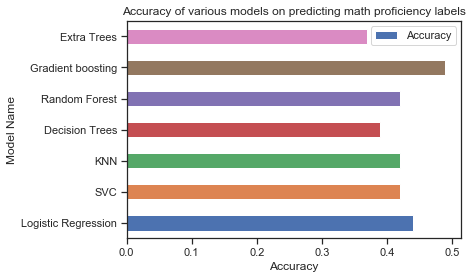

In [153]:
ax = Summary.plot.barh(x='Model Name', y='Accuracy', rot=0)
plt.xlabel('Accuracy')
plt.ylabel('Model Name')
plt.title("Accuracy of various models on predicting math proficiency labels")
plt.legend()  
plt.show()

In [145]:
Summary.head(10)

,Model Name,Accuracy,Precision,Recall,F1score
0,Logistic Regression,0.44,0.42,0.44,0.42
1,SVC,0.42,0.43,0.42,0.38
2,KNN,0.42,0.42,0.42,0.42
3,Decision Trees,0.39,0.39,0.39,0.39
4,Random Forest,0.42,0.45,0.42,0.39
5,Gradient boosting,0.49,0.48,0.49,0.47
6,Extra Trees,0.37,0.29,0.37,0.33


In [147]:
models=[]
models.append(('Logistic Regression', lr))
models.append(('Knn', knn))
models.append(('SVC', svc))
models.append(('Decision Trees', dt))
models.append(('Random Forest', rf))
models.append(('Gradient Boosting', gb))
models.append(('Extra Trees',et))
models

[('Logistic Regression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('Knn',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)),
 ('Decision Trees',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl

In [118]:
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
print('A list of each algorithm, the mean accuracy and the standard deviation accuracy.')
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train_std,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

A list of each algorithm, the mean accuracy and the standard deviation accuracy.
Logistic Regression: 0.428118 (0.011521)
Knn: 0.423498 (0.011803)
SVC: 0.415798 (0.011128)
Decision Trees: 0.395235 (0.003535)
Random Forest: 0.412447 (0.009081)
Gradient Boosting: 0.480206 (0.008165)
Extra Trees: 0.391158 (0.007259)


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier #https://stackoverflow.com/questions/58781601/parameter-tuning-using-gridsearchcv-for-gradientboosting-classifier-in-python

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import make_scorer
# #creating Scoring parameter: 
# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score),'recall':make_scorer(recall_score,)}

# # A sample parameter

# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,5,8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#     "n_estimators":[10]
#     }
# #passing the scoring function in the GridSearchCV
# clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)

# clf.fit(X_train_std, y_train)
# #converting the clf.cv_results to dataframe
# df=pd.DataFrame.from_dict(clf.cv_results_)
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))
# #here Possible inputs for cross validation is cv=2, there two split split0 and split1
# df[['split0_test_accuracy','split1_test_accuracy','split0_test_precision','split1_test_precision','split0_test_recall','split1_test_recall']]

In [129]:
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train_std, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [119]:
def grid_best_parameter(X_train_std,y_train,X_test_std,y_test):
    report_table = [[]]
  
  #creating parameter

  
    C=np.logspace(-50, 50, 100)
    alpha= [0.01, 0.1, 0.5, 1.0, 10.0]
    k_range = list(range(1, 16))
    

  # creating pipeline
    pipe_lr=Pipeline([('clf' , LogisticRegression(random_state=42))])
      #pipe_mnb=Pipeline([('clf', MultinomialNB())])
     # pipe_bnb=Pipeline([('clf', BernoulliNB())])
    pipe_svc = Pipeline([('clf', SVC())])
    pipe_dtc = Pipeline([('clf', DecisionTreeClassifier())])
    pipe_rfc = Pipeline([('clf', RandomForestClassifier(random_state=42))])

  #creating parameter

    param_lr =[{'clf__penalty': ['l2'],'clf__C': C, 'clf__solver': ['liblinear','lbfgs']}] 

      #param_mnb=[{'clf__alpha': alpha}]

     # param_bnb=[{'clf__alpha': alpha}]
    param_svc = {'clf__C':np.arange(0.01,100,10)}
    param_dtc = {'clf__criterion':['gini','entropy'],'clf__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
    param_rfc = { 
        'clf__n_estimators': [200, 500],
        'clf__max_features': ['auto', 'sqrt', 'log2'],
        'clf__max_depth' : [4,5,6,7,8],
        'clf__criterion' :['gini', 'entropy']
    }
    # creating gridsearch

    grid_lr=GridSearchCV(estimator=pipe_lr,param_grid=param_lr,scoring='accuracy',cv=10,n_jobs=-1)
     # grid_mnb=GridSearchCV(estimator=pipe_mnb,param_grid=param_mnb,cv=10,verbose=True, n_jobs=-1)
      #grid_bnb=GridSearchCV(estimator=pipe_bnb,param_grid=param_bnb,cv=10,verbose=True, n_jobs=-1)
    grid_svc = GridSearchCV(estimator=pipe_svc,param_grid=param_svc,cv=10,return_train_score=True, n_jobs=1)
    grid_dtc = GridSearchCV(estimator=pipe_dtc,param_grid=param_dtc,cv=10, n_jobs=1)
    grid_rfc = GridSearchCV(estimator=pipe_rfc,param_grid=param_rfc,cv=10, n_jobs=1)

  #listing pipelines

 # grid=[grid_lr, grid_mnb, grid_bnb, grid_svc,grid_dtc, grid_rfc]
    grid=[grid_lr, grid_rfc]

      #dictionary of pipelines and models

      #grid_dict={0: 'Logistic Regression', 1: 'Multi Nomial NB', 2: 'Bernoulli NB', 3:'Linear SVC', 4:'DecisionTreeClassifier', 5:'RandomForestClassifier'}
    grid_dict={0: 'Logistic Regression', 1:'Linear SVC', 2:'DecisionTreeClassifier',3:'RandomForestClassifier'}

      # fitting grid search 

    print('Performing model optimizations...')
    best_accuracy = 0.0
    best_model = 0
    best_grid = ''

    for i, g in enumerate(grid):
        print('\nEstimator: %s' % grid_dict[i])	
        # Fit grid search	
        g.fit(X_train_std, y_train)
        # Best params
        #print('Best params: %s' % g.best_params_)
        # Best training data accuracy
        #print('Best training accuracy: %.3f' % g.best_score_)
        # Predict on train data with best params
        train_prediction = g.predict(X_train_std)
        # Predict on test data with best params
        prediction = g.predict(X_test_std)
        # Test data accuracy of model with best params
        #print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, prediction))
        

    # Track best (highest test accuracy) model
    report_table = report_table+ [[grid_dict[i], g.best_params_, g.score(X_test_std, y_test),precision_score(y_test,prediction),f1_score(y_test,prediction),recall_score(y_test,prediction)]]  
    if accuracy_score(y_test, prediction) > best_accuracy:
        best_accuracy = accuracy_score(y_test, prediction)
        best_model = g
        best_grid = i
        #print('\nClassifier with best test set accuracy: %s' % grid_dict[best_grid])
        #print('\nAccuracy score:%s' % best_accuracy)
        report_table.pop(0)
        report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Accuracy','Precision','F1_score','Recall'])
    return report

In [122]:
# report=grid_best_parameter(X_train_std,y_train,X_test_std,y_test)

Performing model optimizations...

Estimator: Logistic Regression

Estimator: Linear SVC


KeyboardInterrupt: 

In [ ]:
report

In [ ]:

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(report['Model name']),
    y=list(report['Accuracy']),
    name='Accuracy',
))

fig.add_trace(go.Bar(
    x=list(report['Model name']),
    y=list(report['Precision']),
    name='Precision',
))
fig.add_trace(go.Bar(
    x=list(report['Model name']),
    y=list(report['F1_score']),
    name='F1_score',
))
fig.add_trace(go.Bar(
    x=list(report['Model name']),
    y=list(report['Recall']),
    name='Recall',
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45,title_text='Multiple metrics scores for different algorithm')
fig.show()
